In [1]:
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = './data/reviews/renttherunway_final_data.json'

In [3]:
column_data = []
with open(path) as f:
    for line in f:
        try:
            data_json = json.loads(line)
            column_data.append(data_json)
        except:
            pass

In [4]:
df = pd.DataFrame(column_data)
df = df.convert_dtypes()
df.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36,"June 18, 2013"
2,fit,360448,<NA>,1063761,<NA>,10,party,This hugged in all the right places! It was a ...,<NA>,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27,"September 26, 2016"


## Sentiment analysis

In [5]:
from transformers import pipeline

2024-06-29 14:52:30.712692: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-29 14:52:30.856170: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-29 14:52:31.467169: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-29 14:52:34.000586: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/home/luis-carlos/Documents/experiments/nlp_env/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
2024-06-29 14:52:38.728543: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 93763584 exceeds 10% of free system memory.
2024-06-29 14:52:39.107165: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 93763584 exceeds 10% of free system memory.
2024-06-29 14:52:39.143141: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83]

In [7]:
data = ["It was the best of times.", "t was the worst of times."]
res = sentiment_pipeline(data)

In [8]:
res

[{'label': 'POSITIVE', 'score': 0.9994569420814514},
 {'label': 'NEGATIVE', 'score': 0.9987302422523499}]

In [9]:
res[1]

{'label': 'NEGATIVE', 'score': 0.9987302422523499}

In [10]:
def positivity(text):
    result = sentiment_pipeline(text)[0]
    if result['label'] == 'POSITIVE':
        return result['score']
    else:
        return 1 - result['score']

In [11]:
df_sample = df.sample(500)
df_sample.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
31496,fit,113975,34b,1564333,135lbs,10,everyday,I am not one to wear ruffles or florals but th...,athletic,Flattering & Feminine,dress,"5' 11""",8,29,"March 14, 2016"
186419,small,158071,32b,858828,118lbs,10,wedding,This dress was perfect for a wedding. I've ren...,pear,Stunning and elegant dress.,sheath,"5' 0""",8,33,"January 24, 2016"
51199,large,509560,38ddd/e,1301573,200lbs,10,work,Runs large but very lovely dress,hourglass,Simple but really nice dress. I would recommen...,shirtdress,"5' 9""",20,40,"December 28, 2017"
109430,large,14286,34c,222318,<NA>,10,everyday,This is the perfect weekend summer dress. I a...,athletic,Absolutely loved this for everyday!,shift,"5' 5""",14,32,"August 15, 2017"
44696,fit,125920,34b,948396,<NA>,10,wedding,I wore this dress to a black tie wedding. I re...,athletic,Wedding event,gown,"5' 8""",17,23,"November 12, 2017"


In [12]:
df_sample.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
31496,fit,113975,34b,1564333,135lbs,10,everyday,I am not one to wear ruffles or florals but th...,athletic,Flattering & Feminine,dress,"5' 11""",8,29,"March 14, 2016"
186419,small,158071,32b,858828,118lbs,10,wedding,This dress was perfect for a wedding. I've ren...,pear,Stunning and elegant dress.,sheath,"5' 0""",8,33,"January 24, 2016"
51199,large,509560,38ddd/e,1301573,200lbs,10,work,Runs large but very lovely dress,hourglass,Simple but really nice dress. I would recommen...,shirtdress,"5' 9""",20,40,"December 28, 2017"
109430,large,14286,34c,222318,<NA>,10,everyday,This is the perfect weekend summer dress. I a...,athletic,Absolutely loved this for everyday!,shift,"5' 5""",14,32,"August 15, 2017"
44696,fit,125920,34b,948396,<NA>,10,wedding,I wore this dress to a black tie wedding. I re...,athletic,Wedding event,gown,"5' 8""",17,23,"November 12, 2017"


In [13]:
# Takes time
res = df_sample['review_text'].apply(positivity)
df_sample['positivity'] = res

In [14]:
df_sample.size

8000

In [15]:
df_sample.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,positivity
31496,fit,113975,34b,1564333,135lbs,10,everyday,I am not one to wear ruffles or florals but th...,athletic,Flattering & Feminine,dress,"5' 11""",8,29,"March 14, 2016",0.975921
186419,small,158071,32b,858828,118lbs,10,wedding,This dress was perfect for a wedding. I've ren...,pear,Stunning and elegant dress.,sheath,"5' 0""",8,33,"January 24, 2016",0.990384
51199,large,509560,38ddd/e,1301573,200lbs,10,work,Runs large but very lovely dress,hourglass,Simple but really nice dress. I would recommen...,shirtdress,"5' 9""",20,40,"December 28, 2017",0.999753
109430,large,14286,34c,222318,<NA>,10,everyday,This is the perfect weekend summer dress. I a...,athletic,Absolutely loved this for everyday!,shift,"5' 5""",14,32,"August 15, 2017",0.999747
44696,fit,125920,34b,948396,<NA>,10,wedding,I wore this dress to a black tie wedding. I re...,athletic,Wedding event,gown,"5' 8""",17,23,"November 12, 2017",0.999835


<Axes: xlabel='rating', ylabel='positivity'>

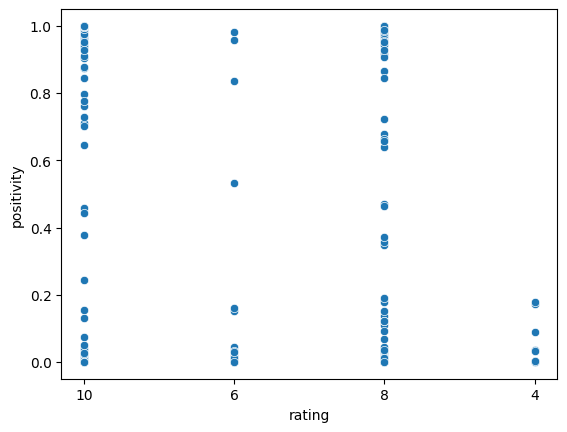

In [16]:
sns.scatterplot(data=df_sample, x='rating', y='positivity')

<Axes: xlabel='rating', ylabel='positivity'>

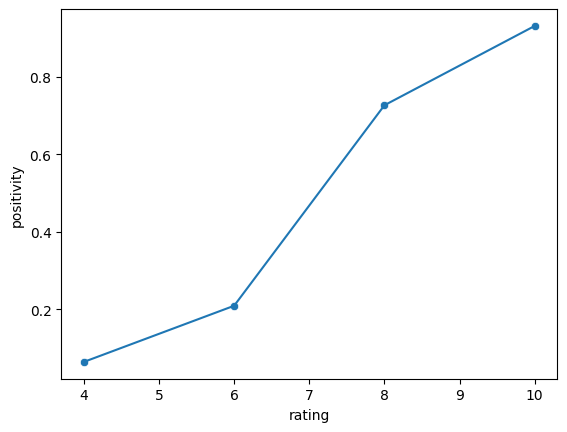

In [17]:
a = df_sample.groupby('rating')['positivity'].mean().reset_index()
a['rating'] = a['rating'].astype('int')
sns.scatterplot(data = a.sort_values(by='rating', ascending=True), x = 'rating', y='positivity')
sns.lineplot(data = a.sort_values(by='rating', ascending=True), x = 'rating', y='positivity')

In [19]:
df.to_csv('./data/reviews/renttherunway_final_data_clean.csv', index=False)

## NER

In [25]:
import spacy
from spacy import displacy

# python -m spacy download en_core_web_sm
#import en_core_web_sm
#nlp = en_core_web_sm.load()

In [26]:
NER = spacy.load("en_core_web_sm")

In [27]:
raw_text="The Indian Space Research Organisation or is the national space agency of India, headquartered in Bengaluru. It operates under Department of Space which is directly overseen by the Prime Minister of India while Chairman of ISRO acts as executive of DOS as well."
text1= NER(raw_text)

In [31]:
a = []
for word in text1.ents:
    #print(word.text, word.label_)
    a.append({'label': word.label_, 'text': word.text})

In [32]:
a

[{'label': 'ORG', 'text': 'The Indian Space Research Organisation'},
 {'label': 'GPE', 'text': 'India'},
 {'label': 'GPE', 'text': 'Bengaluru'},
 {'label': 'ORG', 'text': 'Department of Space'},
 {'label': 'GPE', 'text': 'India'},
 {'label': 'ORG', 'text': 'ISRO'},
 {'label': 'ORG', 'text': 'DOS'}]